In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

In [3]:
df_recall_data = pd.read_csv('./Recalls_Data.csv')

In [4]:
# Data Profiling and Cleaning

In [5]:
df_recall_data.describe()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action
count,26592,26592,26592,26592,26592,26592,26547,26592,26550,24191,21704,24204
unique,9539,26592,26592,2932,15190,40,9832,4,9378,23450,15727,23511
top,10/17/2013,23V002000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"General Motors, LLC",REFRIGERATOR/DOMETIC,EQUIPMENT,NR (Not Reported),Vehicle,1,ON CERTAIN TRAILERS EQUIPPED WITH SEALCO SPRIN...,RELEASE OF COOLANT UNDER CERTAIN CONDITIONS CO...,DEALERS WILL EQUIP AIR SYSTEMS WITH A PRESSURE...
freq,42,1,1,1612,185,3709,16102,23090,240,28,128,18


In [6]:
# Check Data Types and Null Values
df_recall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26592 entries, 0 to 26591
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Report Received Date  26592 non-null  object
 1   NHTSA ID              26592 non-null  object
 2   Recall Link           26592 non-null  object
 3   Manufacturer          26592 non-null  object
 4   Subject               26592 non-null  object
 5   Component             26592 non-null  object
 6   Mfr Campaign Number   26547 non-null  object
 7   Recall Type           26592 non-null  object
 8   Potentially Affected  26550 non-null  object
 9   Recall Description    24191 non-null  object
 10  Consequence Summary   21704 non-null  object
 11  Corrective Action     24204 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB


In [7]:
# Changing Column Names (Removing Spaces)
df_recall_data.columns = [c.replace(' ', '_') for c in df_recall_data.columns]

In [8]:
print(df_recall_data['Potentially_Affected'])

0            341
1             74
2            263
3          1,042
4            174
          ...   
26587     18,572
26588        125
26589    138,878
26590     70,644
26591     68,184
Name: Potentially_Affected, Length: 26592, dtype: object


In [9]:
# Removing commas and changing datatype for Potentially Affected into numeric
df_recall_data['Potentially_Affected'] = df_recall_data['Potentially_Affected'].astype('string').str.replace(',', '').apply(pd.to_numeric)

In [10]:
# Changing DataType for Received Date into DateTime
df_recall_data['Report_Received_Date'] = df_recall_data['Report_Received_Date'].astype('datetime64[ns]')

In [11]:
df_recall_data.head(5)

,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action
0,2023-01-06,23V002000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Triple E Recreational Vehicles,Battery Disconnect Switch May Short,ELECTRICAL SYSTEM,CA#10253-1,Vehicle,341.0,Triple E Recreational Vehicles (Triple E) is r...,An electrical short-circuit can increase the r...,Dealers will install two rubber terminal post ...
1,2023-01-05,23V001000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volvo Car USA, LLC",Steering Wheel May Lock Up,STEERING,R10213,Vehicle,74.0,"Volvo Car USA, LLC (Volvo Car) is recalling ce...",A screw inside the gearbox housing can cause t...,"Dealers will replace the steering gear, free o..."
2,2023-01-04,23E001000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Adventurer LP,Propane Leak May Cause Fire,EQUIPMENT,NR (Not Reported),Equipment,263.0,Adventurer LP (Adventurer) is recalling certai...,A propane leak in the presence of an ignition ...,"Dealers will inspect and if necessary, replace..."
3,2022-12-29,22V956000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",12-Volt Battery Cable May Short Circuit,ELECTRICAL SYSTEM,97HA,Vehicle,1042.0,"Volkswagen Group of America, Inc. (Volkswagen)...",A short circuit may cause a loss of drive powe...,Owners are advised to park outside and away fr...
4,2022-12-29,22C008000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,JD E-Commerce America Limited,Child Seat May Be Improperly Installed/FMVSS 213,CHILD SEAT,NR (Not Reported),Child Seat,174.0,JD E-Commerce America Limited (Joybuy Express)...,"The child seat may be improperly installed, in...",Joybuy Express will provide a refund to purcha...


In [12]:
df_recall_data.tail(5)

,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action
26587,1966-09-29,66V003000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Honda (American Honda Motor Co.),POWER TRAIN:TRANSMISSION:STANDARD:MANUAL,POWER TRAIN,NR (Not Reported),Vehicle,18572.0,NaN,NaN,NaN
26588,1966-09-19,66V178000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"RENAULT, INCORPORATED",BRAKES:HYDRAULIC:LINES:HOSE:NON-METALLIC,"SERVICE BRAKES, HYDRAULIC",NR (Not Reported),Vehicle,125.0,POSSIBILITY THAT THE FRONT BRAKE HOSE END FITT...,IF SUCH LEAKAGE OCCURS AND IF ENOUGH BRAKE FLU...,(REPLACE FRONT BRAKE HOSES AND SEALS.)
26589,1966-01-19,66V032001,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"General Motors, LLC",STEERING:COLUMN,STEERING,NR (Not Reported),Vehicle,138878.0,NaN,NaN,NaN
26590,1966-01-19,66V032003,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"General Motors, LLC",STEERING:COLUMN,STEERING,NR (Not Reported),Vehicle,70644.0,NaN,NaN,NaN
26591,1966-01-19,66V032004,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"General Motors, LLC",STEERING:COLUMN,STEERING,NR (Not Reported),Vehicle,68184.0,NaN,NaN,NaN


In [13]:
df_recall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26592 entries, 0 to 26591
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Report_Received_Date  26592 non-null  datetime64[ns]
 1   NHTSA_ID              26592 non-null  object        
 2   Recall_Link           26592 non-null  object        
 3   Manufacturer          26592 non-null  object        
 4   Subject               26592 non-null  object        
 5   Component             26592 non-null  object        
 6   Mfr_Campaign_Number   26547 non-null  object        
 7   Recall_Type           26592 non-null  object        
 8   Potentially_Affected  26550 non-null  float64       
 9   Recall_Description    24191 non-null  object        
 10  Consequence_Summary   21704 non-null  object        
 11  Corrective_Action     24204 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.4+ MB


In [14]:
# Checking Years in the dataset

In [15]:
df_recall_data['Year'] = df_recall_data['Report_Received_Date'].dt.strftime('%Y')

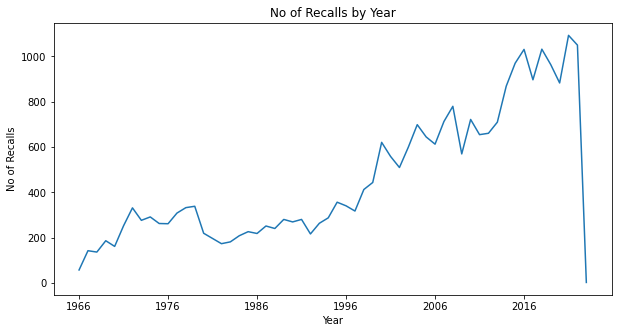

In [16]:
df_group_by_year = df_recall_data.groupby('Year')['NHTSA_ID'].count()
df_group_by_year.plot(kind = 'line', figsize=(10,5), title = 'No of Recalls by Year', 
                      ylabel = 'No of Recalls', xlabel = 'Year')
plt.show()

In [17]:
df_recall_data[df_recall_data['Year'] == '2023']

,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action,Year
0,2023-01-06,23V002000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Triple E Recreational Vehicles,Battery Disconnect Switch May Short,ELECTRICAL SYSTEM,CA#10253-1,Vehicle,341.0,Triple E Recreational Vehicles (Triple E) is r...,An electrical short-circuit can increase the r...,Dealers will install two rubber terminal post ...,2023
1,2023-01-05,23V001000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volvo Car USA, LLC",Steering Wheel May Lock Up,STEERING,R10213,Vehicle,74.0,"Volvo Car USA, LLC (Volvo Car) is recalling ce...",A screw inside the gearbox housing can cause t...,"Dealers will replace the steering gear, free o...",2023
2,2023-01-04,23E001000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Adventurer LP,Propane Leak May Cause Fire,EQUIPMENT,NR (Not Reported),Equipment,263.0,Adventurer LP (Adventurer) is recalling certai...,A propane leak in the presence of an ignition ...,"Dealers will inspect and if necessary, replace...",2023


In [18]:
# filter where year = 2022
df_recall_data.query("Year == '2022' ")
# anothery way : df_recall_data[df_recall_data['Year'] == '2022']

,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action,Year
3,2022-12-29,22V956000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",12-Volt Battery Cable May Short Circuit,ELECTRICAL SYSTEM,97HA,Vehicle,1042.0,"Volkswagen Group of America, Inc. (Volkswagen)...",A short circuit may cause a loss of drive powe...,Owners are advised to park outside and away fr...,2022
4,2022-12-29,22C008000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,JD E-Commerce America Limited,Child Seat May Be Improperly Installed/FMVSS 213,CHILD SEAT,NR (Not Reported),Child Seat,174.0,JD E-Commerce America Limited (Joybuy Express)...,"The child seat may be improperly installed, in...",Joybuy Express will provide a refund to purcha...,2022
5,2022-12-29,22V957000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Indian Motorcycle Company,Kickstand May Not Retract Properly/FMVSS 123,STRUCTURE,I-23-01,Vehicle,4653.0,Indian Motorcycle Company (Indian) is recallin...,A kickstand that does not properly retract can...,The remedy is currently under development. Ow...,2022
6,2022-12-29,22E102000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hendrickson USA. L.L.C.,Loose Brake Pad Retaining Clip May Damage Tire,"SERVICE BRAKES, AIR",NR (Not Reported),Equipment,12.0,"Hendrickson USA, L.L.C. (Hendrickson) is recal...",A retaining clip or bracket that detaches can ...,All affected VanTraxx assemblies have been ins...,2022
7,2022-12-23,22V952000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Lion Electric Company,Adjusting Ring Fasteners Not Tightened Properly,SUSPENSION,NR (Not Reported),Vehicle,13.0,Lion Electric Company (Lion) is recalling cert...,"The suspension can separate from the frame, ca...",Lion will inspect and tighten the fasteners as...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2022-01-07,22V004000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Forest River, Inc.",Tire Belt Separation,TIRES,51-1449,Vehicle,1164.0,"Forest River, Inc. (Forest River) is recalling...",Belt separation could lead to loss of vehicle ...,"Dealers will inspect the tire DOT codes, and r...",2022
1049,2022-01-07,22V005000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Lakota Corporation,Tire Belt Separation,TIRES,NR (Not Reported),Vehicle,100.0,Lakota Corporation (Lakota) is recalling certa...,Belt separation could lead to loss of vehicle ...,"Dealers will replace the tires, free of charge...",2022
1050,2022-01-07,22V003000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Forest River, Inc.",Unsealed Cooktop May Cause Burner Flames to In...,EQUIPMENT,203-1454,Vehicle,1097.0,"Forest River, Inc. (Forest River) is recalling...",An inverted flame can increase the risk of a f...,Dealers will seal the furnace from the cooktop...,2022
1051,2022-01-04,22V002000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"LGS Industries, Inc.",Rear Door Winch Cable May Break,STRUCTURE,NR (Not Reported),Vehicle,9.0,"LGS Industries, Inc. (LGS) is recalling certai...",A broken electric winch cable may allow the re...,"LGS will install a BLOCSTOP fall arrestor, fre...",2022


In [19]:
# Filter the dataframe to a single year 2022
df_recall_data = df_recall_data.query("Year == '2022' ")

In [20]:
df_recall_data.shape

(1050, 13)

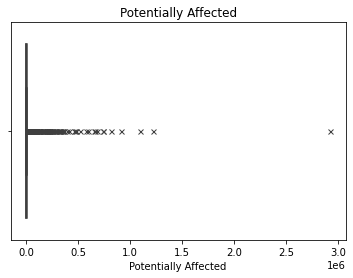

In [21]:
# Removing ouliers in the dataset by interquartile range
sns.boxplot(
    data=df_recall_data, x="Potentially_Affected",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
)
plt.title('Potentially Affected')
plt.xlabel('Potentially Affected')
plt.show()

In [22]:
Q1 = df_recall_data['Potentially_Affected'].quantile(0.25)

In [23]:
Q3 = df_recall_data['Potentially_Affected'].quantile(0.75)

In [24]:
IQR = Q3-Q1

In [25]:
print(IQR)

5812.0


In [26]:
df_recall_data = df_recall_data[~((df_recall_data['Potentially_Affected'] < (Q1 - 1.5 * IQR)) |(df_recall_data['Potentially_Affected'] > (Q3 + 1.5 * IQR)))]

In [27]:
df_recall_data.shape

(850, 13)

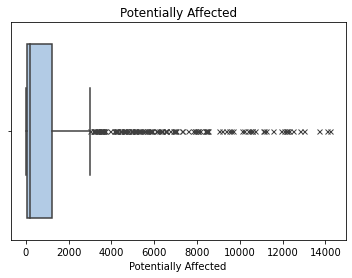

In [28]:
sns.boxplot(
    data=df_recall_data, x="Potentially_Affected",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
)
plt.title('Potentially Affected')
plt.xlabel('Potentially Affected')
plt.show()

In [29]:
# Group by Recall Type
df_group_by_recall = df_recall_data.groupby('Recall_Type')['NHTSA_ID'].count()

In [30]:
print(df_group_by_recall)

Recall_Type
Child Seat      3
Equipment      84
Tire           13
Vehicle       750
Name: NHTSA_ID, dtype: int64


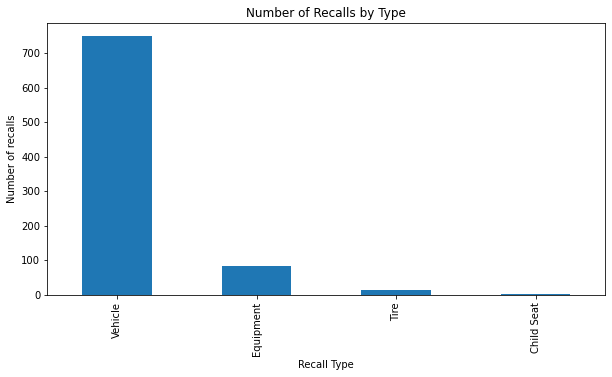

In [31]:
# No of Recalls by Type
df_recall_data.Recall_Type.value_counts().plot(kind='bar', figsize=(10,5), title = 'Number of Recalls by Type', 
                                               xlabel = 'Recall Type', ylabel = 'Number of recalls' )
plt.show()

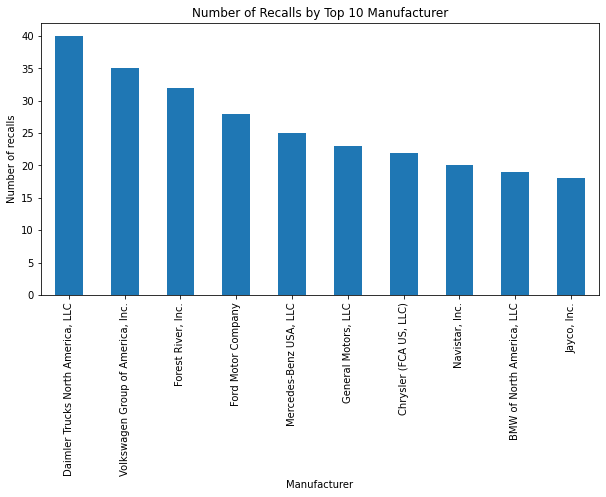

In [32]:
# No of Recalls by Manufacturer
df_recall_data.Manufacturer.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5), title = "Number of Recalls by Top 10 Manufacturer"
                                                            , xlabel = 'Manufacturer', ylabel = 'Number of recalls' )
plt.show()

In [33]:
# No of Potentially Affected by Type
df_group_by_recall_sum_affected = df_recall_data.groupby('Recall_Type')['Potentially_Affected'].sum()

In [34]:
print(df_group_by_recall_sum_affected)

Recall_Type
Child Seat     11471.0
Equipment     165401.0
Tire           49077.0
Vehicle       941188.0
Name: Potentially_Affected, dtype: float64


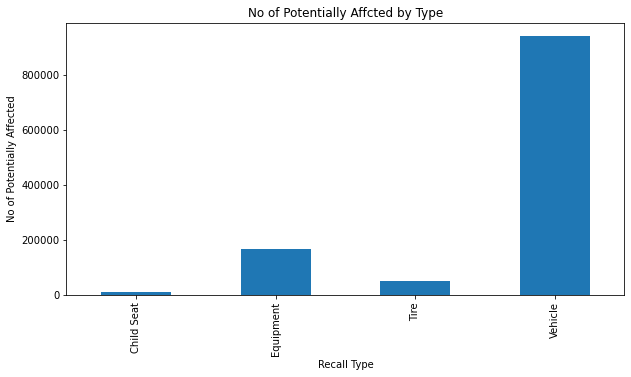

In [35]:
df_group_by_recall_sum_affected.plot(kind = 'bar', figsize=(10,5), title = 'No of Potentially Affcted by Type',
                                     ylabel = 'No of Potentially Affected', xlabel = 'Recall Type')
plt.show()

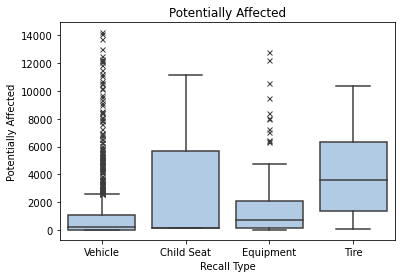

In [36]:
sns.boxplot(
    data=df_recall_data, x="Recall_Type", y = 'Potentially_Affected',
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
)
plt.title('Potentially Affected')
plt.ylabel('Potentially Affected')
plt.xlabel('Recall Type')
plt.show()

In [37]:
df_group_by_manufacturer_sum_affected = df_recall_data.groupby('Manufacturer')['Potentially_Affected'].sum()

In [38]:
print(df_group_by_manufacturer_sum_affected.nlargest(10))

Manufacturer
Volkswagen Group of America, Inc.    75027.0
Chrysler (FCA US, LLC)               47631.0
Ford Motor Company                   46796.0
Navistar, Inc.                       46403.0
Mercedes-Benz USA, LLC               37520.0
Daimler Trucks North America, LLC    36283.0
BMW of North America, LLC            36218.0
General Motors, LLC                  35319.0
Forest River, Inc.                   35298.0
Nissan North America, Inc.           30930.0
Name: Potentially_Affected, dtype: float64


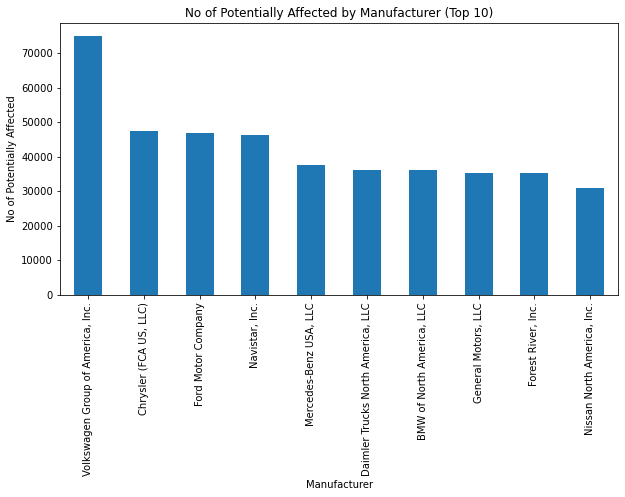

In [39]:
df_group_by_manufacturer_sum_affected.nlargest(10).plot(kind='bar', figsize=(10,5), 
                                                        title = 'No of Potentially Affected by Manufacturer (Top 10)',
                                                        xlabel = 'Manufacturer', ylabel = 'No of Potentially Affected')
plt.show()

In [94]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import string

In [95]:
# Example data
consequence_data = df_recall_data['Consequence_Summary']

# Tokenization
tokenized_consequences = [word_tokenize(consequence) for consequence in consequence_data]

# Remove stop words
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

filtered_consequences = [
    [lemmatizer.lemmatize(word.lower()) for word, tag in pos_tag(consequence)
     if word.lower() not in stop_words and tag != 'VB' and word.lower() not in punctuation]
    for consequence in tokenized_consequences
]

In [96]:
# Flatten the list of tokenized consequences
all_words = [word for consequence in filtered_consequences for word in consequence]

# Calculate word frequencies
freq_dist = FreqDist(all_words)
most_common = freq_dist.most_common(20)
consequences = [consequence[0] for consequence in most_common]
frequencies = [freq[1] for freq in most_common]

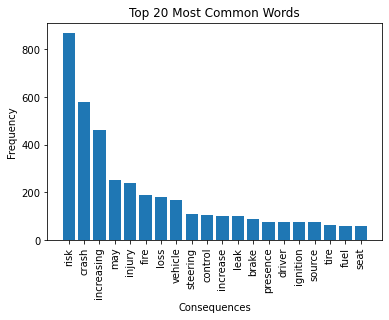

In [97]:
# Create a bar plot
plt.bar(consequences, frequencies)
plt.xlabel('Consequences')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()